## Data Preparataion

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df= pd.read_csv("/home/jovyan/MonDossier/python 2026/datasets/House_Price_dataset.csv")
df.head(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


### Exploring dataset

In [83]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [84]:
len(df)

168446

In [85]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

26% of the data is missing the agency and the agent

In [86]:
df_filled = df.fillna("unknown")

In [87]:
df_filled["agent"].unique()

array(['unknown', 'Muhammad Junaid Ceo Muhammad Shahid Director',
       'Balqiaz Marwat', ..., 'Ahmed Arslan', 'Muhammad Hasan, Farrukh',
       'Basit Aziz'], dtype=object)

In [88]:
df_filled["agency"].unique()

array(['unknown', 'Easy Property', 'Ettemad Enterprises', ...,
       'Al Jeddah Estate Agency', 'Land Shark',
       'Al Barka Property Consultant'], dtype=object)

# Handling Duplicates

In [89]:
df_filled.duplicated().sum()

0

# Correcting datatypes

In [90]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         168446 non-null  object 
 16  agent          168446 non-null  object 
 17  Area Type      168446 non-nul

In [91]:
df_filled["area sqrt"]= np.where(df_filled["Area Type"]=="Marla", df_filled["Area Size"]*272.25, df_filled["Area Size"]*5445)

In [92]:
df_filled["date_added"]=pd.to_datetime(df_filled["date_added"])
df_filled["property_id"]=df_filled["property_id"].astype(str)
df_filled["location_id"]=df_filled["location_id"].astype(str)

In [93]:
df_new = df_filled.drop(columns=["Area Size","area", "Area Category","Area Type"])

# Handling Outliers

In [94]:
df_new[['price', 'baths', 'bedrooms', 'area sqrt']].describe()

,price,baths,bedrooms,area sqrt
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05
mean,1.776576e+07,2.874227,3.179422,3.252030e+03
std,3.531003e+07,2.463400,1.971401,2.460602e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,0.000000,2.000000,1.306800e+03
50%,8.500000e+06,3.000000,3.000000,1.932975e+03
75%,1.950000e+07,4.000000,4.000000,3.267000e+03
max,2.000000e+09,403.000000,68.000000,4.356000e+06


## Outliers in price

The 1st percentile is the value below which only 1% of data falls.

This naturally avoids impossible values (like negatives or zero) because it’s based on actual observed data, not a formula that can extrapolate.

Similarly, the 99th percentile avoids extremely high outliers while still reflecting the dataset.

using quantile for high outliers and percentile for low outliers

In [95]:
Q1=df_new["price"].quantile(0.25)
Q3=df_new["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"(outliers are lower than {lower_bound} and more than {upper_bound})")

(outliers are lower than -28812500.0 and more than 48487500.0)


In [96]:
lower_bound_percentile = df_new["price"].quantile(0.01)
print(f"(outliers are lower than {lower_bound_percentile}and more than {upper_bound})")

(outliers are lower than 15000.0and more than 48487500.0)


In [97]:

df_1= df_new[(df_new["price"] > 15000.0) & (df_new["price"] < 48487500.0)]


## Skewness

In [98]:
from scipy.stats import skew
skewness = skew(df_1["price"])
print("Skewness:", skewness)

Skewness: 1.2716106312762177


positive skew = Most data is low/moderate, few extreme high values

Text(0.5, 1.0, 'price')

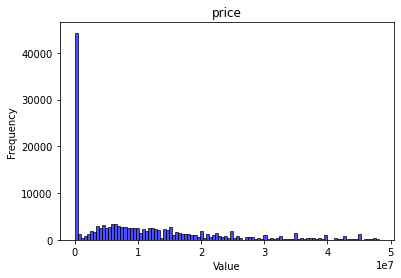

In [99]:
plt.hist(df_1["price"], bins = 100,color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('price')

## Outliers in other columns

In [100]:
#define outliers with percentile and quantile
def quantile(df1):
    Q1= df1.quantile(0.25)
    Q3= df1.quantile(0.75)
    IQR =  Q3-Q1
    higher_bound_new = Q3+1.5*IQR
    lower_bound_percentile = df1.quantile(0.01)
    print(f"the data should be higher than {lower_bound_percentile} and lower than {higher_bound_new}")
    
numerical_columns=["baths","bedrooms","area sqrt"]
for column in numerical_columns: 
    print(f"\nColumn: {column}")
    quantile(df_1[column])


Column: baths
the data should be higher than 0.0 and lower than 8.5

Column: bedrooms
the data should be higher than 0.0 and lower than 7.0

Column: area sqrt
the data should be higher than 490.05 and lower than 4846.05


In [101]:
#clean data from outliers
    
clean_data1= df_1[(df_1["baths"] > 0) & (df_1["baths"] < 8.5)]
clean_data2= clean_data1[(clean_data1["bedrooms"] > 0) & (clean_data1["bedrooms"] < 7.0)]
clean_data= clean_data2[(clean_data2["area sqrt"] >490.05) & (clean_data2["area sqrt"] < 4846.05)]


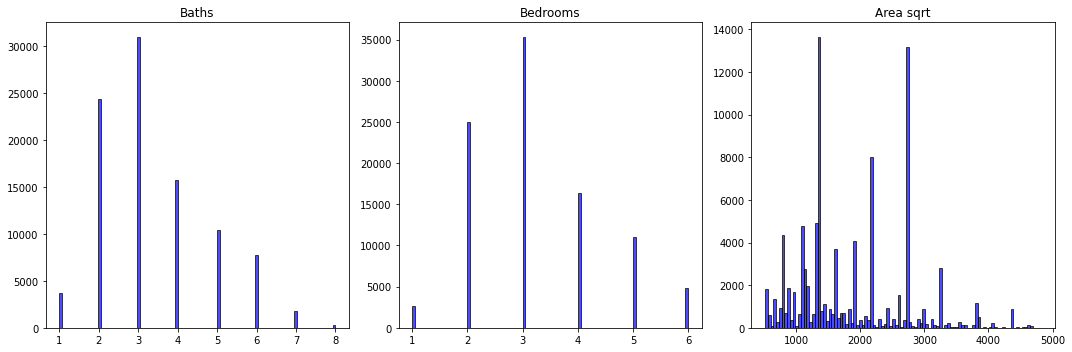

In [102]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(clean_data["baths"], bins=100, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title("Baths")

axes[1].hist(clean_data["bedrooms"], bins=100, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Bedrooms")

axes[2].hist(clean_data["area sqrt"], bins=100, color='blue', edgecolor='black', alpha=0.7)
axes[2].set_title("Area sqrt")

plt.tight_layout()
plt.show()


In [103]:
numerical_columns=["baths","bedrooms","area sqrt"]
for column in numerical_columns: 
    skewness_1=  skew(clean_data[column])
    print(f" for column {column}, the skewness is {skewness_1}")

 for column baths, the skewness is 0.6803980565764799
 for column bedrooms, the skewness is 0.5751160155159476
 for column area sqrt, the skewness is 0.733509678533218


- baths (positive skew) most houses have few baths , only few houses have a lot of baths 
- area sqrt (positive skew) most houses have small areas , few have really large areas

## Log Price

In [104]:
clean_data["log_price"]= np.log10(clean_data["price"])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


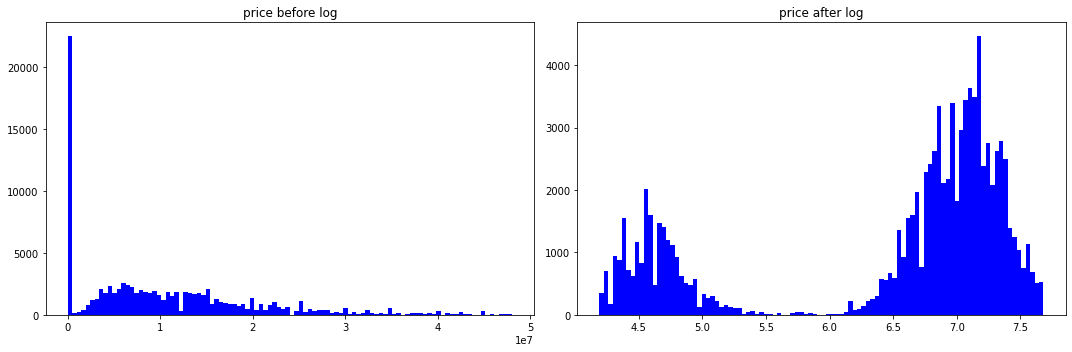

In [105]:
fig, ax=  plt.subplots(1, 2,figsize=(15, 5))
ax[0].hist(clean_data["price"],color= "blue", bins = 100)
ax[0].set_title("price before log")
ax[1].hist(clean_data["log_price"],color= "blue", bins = 100)
ax[1].set_title("price after log")

plt.tight_layout()
plt.show()

In [106]:
skewness_2=  skew(clean_data["log_price"])
print(skewness_2)

-1.0711466931936615


## Sqrt Price

In [107]:
clean_data["sqrt price"] = np.sqrt(clean_data["price"])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


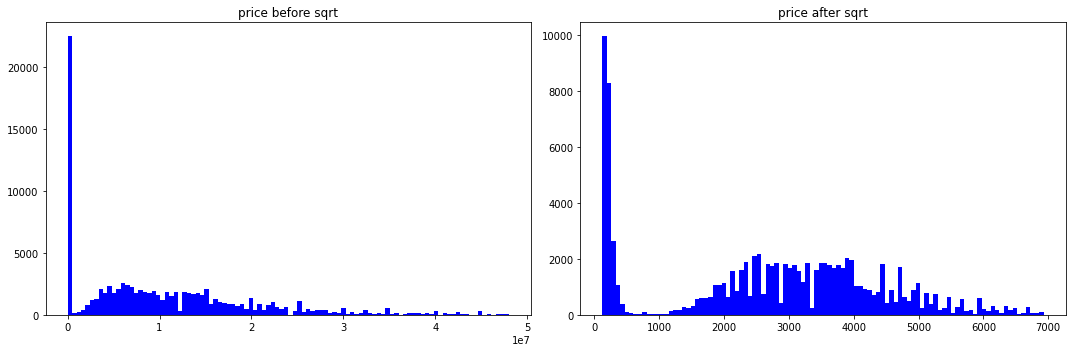

In [108]:
fig, ax=  plt.subplots(1, 2,figsize=(15, 5))
ax[0].hist(clean_data["price"],color= "blue", bins = 100)
ax[0].set_title("price before sqrt")
ax[1].hist(clean_data["sqrt price"],color= "blue", bins = 100)
ax[1].set_title("price after sqrt")

plt.tight_layout()
plt.show()

In [109]:
skewness_2=  skew(clean_data["sqrt price"])
print(skewness_2)

-0.06214326364875506


In [111]:
clean_data_vf= clean_data.drop(columns =["log_price","price"])

## Adding Categorical data as features: creating dummies

In [ ]:
clean_data_vf.select_dtypes(exclude=["number"]).columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'location',
       'city', 'province_name', 'purpose', 'date_added', 'agency', 'agent'],
      dtype='object')

In [ ]:
clean_data_vf["property_type"].value_counts()

House            55087
Flat             28763
Upper Portion     6365
Lower Portion     4607
Penthouse          226
Room               113
Farm House           9
Name: property_type, dtype: int64

In [ ]:
rare = ['Penthouse', 'Room', 'Farm House']
clean_data_vf['property_type'] = clean_data_vf['property_type'].replace(rare, 'Other')

In [ ]:
clean_data_vf["city"].value_counts()

Karachi       38563
Lahore        24791
Islamabad     18390
Rawalpindi    11289
Faisalabad     2137
Name: city, dtype: int64

In [ ]:
clean_data_vf["purpose"].value_counts()

For Sale    72748
For Rent    22422
Name: purpose, dtype: int64

In [ ]:
clean_data_vf = pd.get_dummies(clean_data_vf, columns=["property_type", "city","purpose"], drop_first=True)

In [ ]:
clean_data_vf["rooms"]= clean_data_vf["baths"]+clean_data_vf["bedrooms"]

In [ ]:
clean_data_vf.drop(columns=["bedrooms", "baths"], inplace = True)

## Correlation

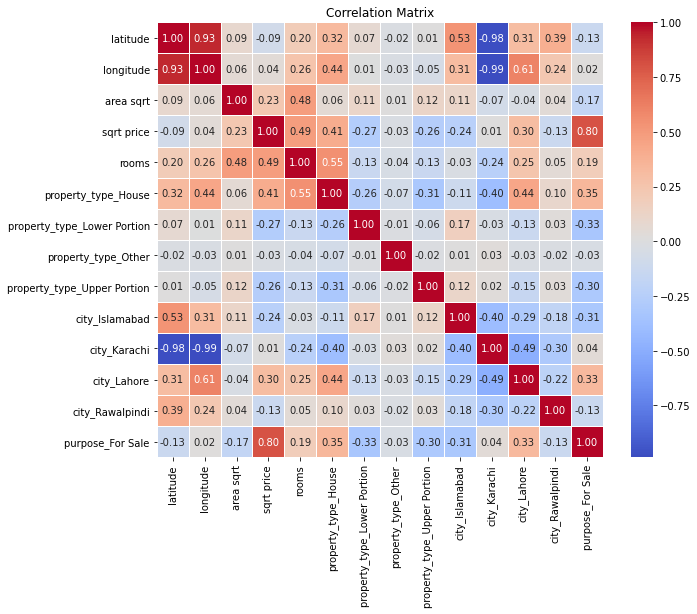

In [ ]:

correlation_matrix_new = clean_data_vf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
new_values =correlation_matrix_new["sqrt price"]
abs(new_values).sort_values(ascending=False)

sqrt price                     1.000000
purpose_For Sale               0.802884
rooms                          0.485125
property_type_House            0.405611
city_Lahore                    0.304849
property_type_Lower Portion    0.269783
property_type_Upper Portion    0.261246
city_Islamabad                 0.236147
area sqrt                      0.232183
city_Rawalpindi                0.127819
latitude                       0.085525
longitude                      0.042457
property_type_Other            0.028798
city_Karachi                   0.012574
Name: sqrt price, dtype: float64

## Multicollinearity

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


variables = clean_data_vf[["rooms","purpose_For Sale","property_type_House","city_Lahore"]]


vif = pd.DataFrame()


vif_values = []


for i in range(variables.shape[1]):
    vif_value = variance_inflation_factor(variables.values, i)
    vif_values.append(vif_value)


vif['Features'] = variables.columns


vif['VIF'] = vif_values


vif

,Features,VIF
0,rooms,5.109605
1,purpose_For Sale,3.946265
2,property_type_House,3.958979
3,city_Lahore,1.744832


## Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ["sqrt price", "rooms", "area sqrt"] 

scaler = StandardScaler()
df_scaled = clean_data_vf.copy()
df_scaled[numerical_columns] = scaler.fit_transform(clean_data_vf[numerical_columns])


df_scaled.head()

,property_id,location_id,page_url,location,province_name,latitude,longitude,date_added,agency,agent,...,rooms,property_type_House,property_type_Lower Portion,property_type_Other,property_type_Upper Portion,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Sale
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,G-10,Islamabad Capital,33.679890,73.012640,2019-02-04,unknown,unknown,...,-1.048154,0,0,0,0,1,0,0,0,1
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,E-11,Islamabad Capital,33.700993,72.971492,2019-05-04,unknown,unknown,...,-0.248164,0,0,0,0,1,0,0,0,1
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,G-15,Islamabad Capital,33.631486,72.926559,2019-07-17,unknown,unknown,...,1.751813,1,0,0,0,1,0,0,0,1
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,DHA Defence,Islamabad Capital,33.492591,73.301339,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,...,-0.248164,1,0,0,0,1,0,0,0,1
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,E-11,Islamabad Capital,33.698244,72.984238,2019-05-05,Ettemad Enterprises,Balqiaz Marwat,...,-1.048154,0,0,0,0,1,0,0,0,1


## Split Data

In [ ]:
x = df_scaled[["rooms","purpose_For Sale","property_type_House","city_Lahore"]]
y= df_scaled["sqrt price"]


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state =365)

## Train the model

In [ ]:
import statsmodels.api as sm
x=sm.add_constant(x_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 6.089e+04
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:39:05   Log-Likelihood:                -53435.
No. Observations:               76136   AIC:                         1.069e+05
Df Residuals:                   76131   BIC:                         1.069e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2893      0.004   -319.364      0.000      -1.297      -1.281
rooms                   0.3735      0.002    177.017      0.000       0.369       0.378
purpose_For Sale        1.7774      0.005    391.594      0.000       1.768       1.786
property_type_House    -0.1070      0.005    -22.720      0.000      -0.116      -0.098
city_Lahore            -0.0307      0.005     -6.687      0.000      -0.040      -0.022
==============================================================================
Omnibus:                     7976.909   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14284.903
Skew:                           0.720   Prob(JB):                         0.00
Kurtosis:                       4.560   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test the Model

In [144]:
# Add constant to test features
x_test_const = sm.add_constant(x_test)

# Align test columns with training columns (important if some dummy columns are missing in test set)
x_test_const = x_test_const.reindex(columns=x_train.columns.insert(0, 'const'), fill_value=0)

y_pred = results.predict(x_test_const)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared on test set:", r2)
print("RMSE on test set:", rmse)



R-squared on test set: 0.7588648069127342
RMSE on test set: 0.49031049305889796


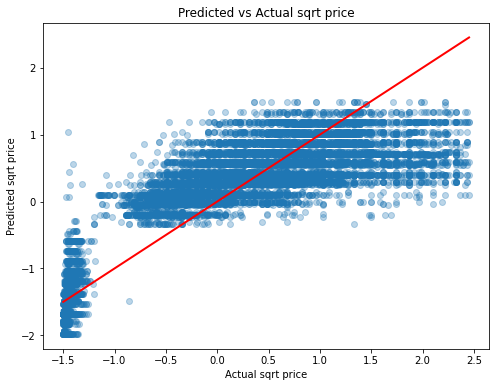

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # perfect fit line
plt.xlabel("Actual sqrt price")
plt.ylabel("Predicted sqrt price")
plt.title("Predicted vs Actual sqrt price")
plt.show()
